# Student Feedback Analysis

This project analyzes student feedback data to understand overall satisfaction,
average ratings across feedback questions, sentiment distribution, and satisfaction trends.
The insights help identify strengths and areas for improvement in the learning experience.


## Dataset Overview and Setup

In this section, the dataset is loaded, cleaned, and prepared for analysis.
Only numerical feedback columns are used for calculations and visualizations.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/student_feedback.csv')

df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

rating_cols = df.select_dtypes(include='number').columns.tolist()

df['overall_satisfaction'] = df[rating_cols].mean(axis=1)


## Overall Satisfaction Distribution

This chart shows how student satisfaction scores are distributed.
It helps understand whether satisfaction levels are generally high, moderate, or low.


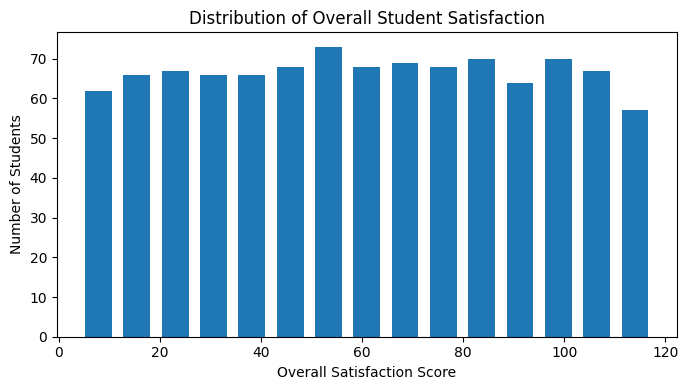

In [13]:
counts, bin_edges = np.histogram(df['overall_satisfaction'], bins=15)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bar_width = (bin_edges[1] - bin_edges[0]) * 0.7

plt.figure(figsize=(7,4))
plt.bar(bin_centers, counts, width=bar_width)
plt.xlabel("Overall Satisfaction Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Overall Student Satisfaction")
plt.tight_layout()
plt.savefig("overall_satisfaction_distribution.png", dpi=300)
plt.show()
plt.close()


## Average Rating per Feedback

This visualization compares the average rating of each feedback question.
It highlights which aspects of the course received stronger or weaker responses.


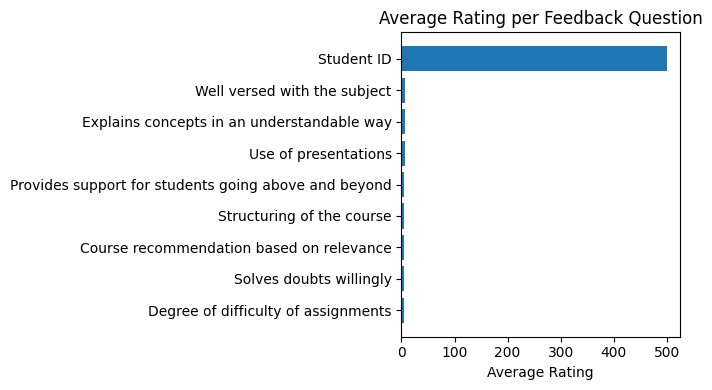

In [14]:
avg_ratings = df[rating_cols].mean().sort_values()

plt.figure(figsize=(7,4))
plt.barh(avg_ratings.index, avg_ratings.values)
plt.xlabel("Average Rating")
plt.title("Average Rating per Feedback Question")
plt.tight_layout()
plt.savefig("average_rating_per_question.png", dpi=300)
plt.show()
plt.close()


## Student Sentiment Analysis

Students are categorized into Negative, Neutral, and Positive sentiment
groups based on their overall satisfaction scores using percentile thresholds.


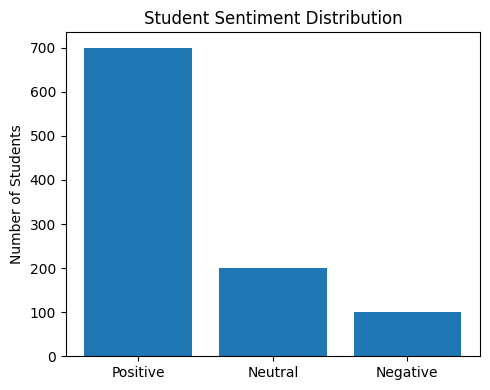

In [15]:
neg_cutoff = df['overall_satisfaction'].quantile(0.10)
neu_cutoff = df['overall_satisfaction'].quantile(0.30)

def assign_sentiment(score):
    if score <= neg_cutoff:
        return 'Negative'
    elif score <= neu_cutoff:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['overall_satisfaction'].apply(assign_sentiment)

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.ylabel("Number of Students")
plt.title("Student Sentiment Distribution")
plt.tight_layout()
plt.savefig("student_sentiment_distribution.png", dpi=300)
plt.show()
plt.close()


## Student Satisfaction analysis

This chart displays the rolling average of satisfaction scores,
revealing overall trends in student satisfaction across the dataset.


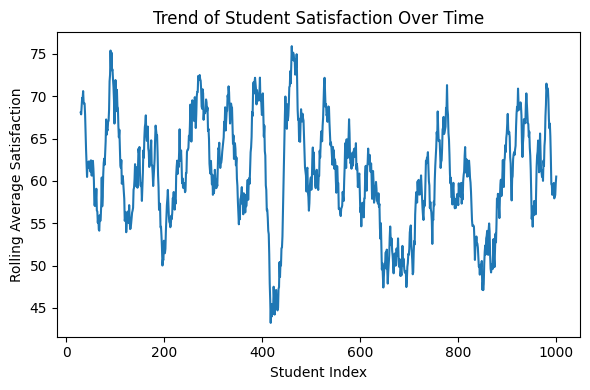

In [16]:
rolling_avg = df['overall_satisfaction'].rolling(window=30).mean()

plt.figure(figsize=(6,4))
plt.plot(rolling_avg)
plt.xlabel("Student Index")
plt.ylabel("Rolling Average Satisfaction")
plt.title("Trend of Student Satisfaction Over Time")
plt.tight_layout()
plt.savefig("student_satisfaction_trend.png", dpi=300)
plt.show()
plt.close()


## Key Insights and Conclusion

- Most students report moderate to high satisfaction levels.
- Certain feedback questions consistently receive higher average ratings.
- Positive sentiment dominates the dataset.
- Satisfaction trends remain relatively stable with minor fluctuations.

These insights can guide improvements in course design and student engagement.
